# Telecom Churn - Group Case Study

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import datetime as dt

In [2]:
df=pd.read_csv('C:/Users/admin/Desktop/TelecomChurnCaseStudy/telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

# Steps followed in Data Preperation:
- Handle Missing values
- Filter High value Customers from the dataset as only they are considered for the analysis
- Derive churn using data for the month of September

In [4]:
#segment columns in groups based on data types

cat_cols=['night_pck_user_6',
          'night_pck_user_7',
          'night_pck_user_8',
          'night_pck_user_9',
          'fb_user_6','fb_user_7',
          'fb_user_8','fb_user_9'] #These columns had only 2 values 0 and 1 indicating yes or no

id_cols=['mobile_number','circle_id'] #Obvious Id columns as mobile number is unique for each customer and there is only one 
# value for circle_id

date_cols=['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'] #They were date columns

num_cols=list(set(df.columns)-set(cat_cols)-set(id_cols)-set(date_cols))

In [5]:
k=round(df.isnull().sum()/df.shape[0]*100,2)
k=k[k!=0]
print(k)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

In [6]:
t=k[k>10] # Adjusting the values to get variables having high missing value percentage
zero_impute_list=[col for col in t.index if col not in cat_cols]
#Remove categorical columns night_pck_user and fb_user from zero impute list
zero_impute_list

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [7]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), 
          [i for i in [col for col in t.index if col not in cat_cols] if '_6' in i]].head(5)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(round(df[[i for i in [col for col in t.index if col not in cat_cols] if '_6' in i]].isna().sum()/df.shape[0]*100,2))
print(round(df[[i for i in [col for col in t.index if col not in cat_cols] if '_7' in i]].isna().sum()/df.shape[0]*100,2))
print(round(df[[i for i in [col for col in t.index if col not in cat_cols] if '_8' in i]].isna().sum()/df.shape[0]*100,2))
print(round(df[[i for i in [col for col in t.index if col not in cat_cols] if '_9' in i]].isna().sum()/df.shape[0]*100,2))

# Same records are having the missing values for each months

date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
dtype: float64
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
av_rech_amt_data_7          74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
dtype: float64
date_of_last_rech_data_8    73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
count_rech_2g_8             73.66
count_rech_3g_8             73.66
av_rech_amt_data_8          73.66
arpu_3g_8                   73.66
arpu_2g_8                   73.66
dtype: float64
date_of_last_rech_data_9    74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
count_rech_2g_9             74.08
cou

In [9]:
# It can thus be inferred that since rech_data and rech_amount are missing together, the customer failed to recharge data for
# those months and hence, we can impute them with 0.

In [10]:
print('Sum of 2g data consumed in June for NA records: {}'.format(df.loc[df['count_rech_2g_6'].isnull(),'vol_2g_mb_6'].sum()))
print('Sum of 2g data consumed in July for NA records: {}'.format(df.loc[df['count_rech_2g_7'].isnull(),'vol_2g_mb_7'].sum()))
print('Sum of 2g data consumed in August for NA records: {}'.format(df.loc[df['count_rech_2g_8'].isnull(),'vol_2g_mb_8'].sum()))
print('Sum of 2g data consumed in September for NA records: {}'.format(df.loc[df['count_rech_2g_9'].isnull(),'vol_2g_mb_9'].sum()))
print()
print('Sum of 3g data consumed in June for NA records: {}'.format(df.loc[df['count_rech_2g_6'].isnull(),'vol_3g_mb_6'].sum()))
print('Sum of 3g data consumed in July for NA records: {}'.format(df.loc[df['count_rech_2g_7'].isnull(),'vol_3g_mb_7'].sum()))
print('Sum of 3g data consumed in August for NA records: {}'.format(df.loc[df['count_rech_2g_8'].isnull(),'vol_3g_mb_8'].sum()))
print('Sum of 3g data consumed in September for NA records: {}'.format(df.loc[df['count_rech_2g_9'].isnull(),'vol_3g_mb_9'].sum()))

Sum of 2g data consumed in June for NA records: 0.0
Sum of 2g data consumed in July for NA records: 0.0
Sum of 2g data consumed in August for NA records: 0.0
Sum of 2g data consumed in September for NA records: 0.0

Sum of 3g data consumed in June for NA records: 0.0
Sum of 3g data consumed in July for NA records: 0.0
Sum of 3g data consumed in August for NA records: 0.0
Sum of 3g data consumed in September for NA records: 0.0


Sum of data volume consumed can be seen as zero, hence proving that all data related missing values can be imputed with zero

In [11]:
df[zero_impute_list]=df[zero_impute_list].fillna(0)

In [12]:
#Fill missing values of cat_cols with Other
df[cat_cols]=df[cat_cols].fillna('-1')

In [13]:
#Next step is to remove columns having only 1 unique value as it adds no meaning to the model

uniques=df.nunique()[df.nunique()==1]
print(uniques)

df.drop(columns=uniques.index,inplace=True)

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


In [14]:
k=round(df.isna().sum()/df.shape[0]*100,2)
print(k[k!=0]) #Remaining missing values are less than 10 percent and can be imputed using iterative imputer

onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_t2c_mou_9       7.75
loc_og_mou_6           3.94
loc_og_mou_7           3.86
loc_og_mou_8           5.38
loc_og_mou_9        

## Filter High Value Customers

In [15]:
hvc=df.copy() #HVC Filter is calculated using data from months 6 and 7 as they indicate the stable period of business

hvc['Total_data_recharge_amt_6']=hvc['total_rech_data_6']*hvc['av_rech_amt_data_6']
hvc['Total_data_recharge_amt_7']=hvc['total_rech_data_7']*hvc['av_rech_amt_data_7']
#Calculating total data recharge money spent record wise

In [16]:
#Calculating total money spent for mobile recharge in each record for months 6 and 7

hvc['Total_amount_spent_6'] = hvc['Total_data_recharge_amt_6'] + hvc['total_rech_amt_6']
hvc['Total_amount_spent_7'] = hvc['Total_data_recharge_amt_7'] + hvc['total_rech_amt_7']

In [17]:
#Avg money spend by the users in the months 6 and 7
hvc['Avg_money_spend']=(hvc['Total_amount_spent_6']+hvc['Total_amount_spent_7'])/2
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(hvc.Avg_money_spend.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [18]:
hvc=hvc[hvc.Avg_money_spend>=hvc.Avg_money_spend.quantile(0.7)]

In [19]:
df_filtered=df.iloc[hvc.index]
df_filtered.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,-1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,-1,968,

In [20]:
df_filtered.reset_index(inplace=True,drop=True)

## Derive Churn

In [21]:
#Churn is calculated on the 9th month using the sum of minutes of usage (incoming and outgoing) + data consumed (2g + 3g)
df_filtered['total_mou_9']=df_filtered['total_ic_mou_9']+df_filtered['total_og_mou_9']
df_filtered['total_data_9']=df_filtered['vol_2g_mb_9']+df_filtered['vol_3g_mb_9']

In [22]:
df_filtered['Churn']=df_filtered.apply(lambda x:1 if x.total_mou_9==0 and x.total_data_9==0 else 0, axis=1)
#Churn variable =1 if mou and data consumed==0 and 0 otherwise

In [23]:
df_filtered.drop(columns=['total_mou_9','total_data_9'],inplace=True)

In [24]:
# Drop variables belonging to 9th month

In [25]:
df_filtered.head() #vbc_3g columns has to be renamed

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,-1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,-

In [26]:
df_filtered.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

In [27]:
[i for i in df_filtered.columns if '_9' in i] #Drop these variables from further analysis

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [28]:
df_filtered.drop(columns=[i for i in df_filtered.columns if '_9' in i],inplace=True)

In [29]:
df_original=df.copy() #Keeping aside original dataframe before hvc filter and churn derivation #Checkpoint
df=df_filtered #df_filtered becomes the new dataframe for analysis

In [30]:
df.shape

(30001, 159)

### Iterative Imputing

In [31]:
cols=list(df.columns) #Removing date cols before iterative imputing as only numerical columns should be there for ii
date_cols=set(date_cols).intersection(set(cols)) #Identifying remaining date_cols in the df
df.drop(columns=date_cols,inplace=True) #Date cols don't add any further information to my analysis and they are dropped
#from modelling

In [32]:
from sklearn.experimental import enable_iterative_imputer #Iterative Imputing remaining columns
from sklearn.impute import IterativeImputer
ii=IterativeImputer(random_state=42)
df_clean=ii.fit_transform(df)
df[df.columns]=df_clean #df_clean becomes the new dataframe for analysis

In [33]:
df.isna().sum()

mobile_number         0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7    

In [34]:
df.drop(columns='mobile_number',inplace=True) #Drop mobile number as it is unique and cannot be used for modelling

In [35]:
df[set(df.columns)-set(cat_cols)].describe() # There are some negative values which has to be examined

,loc_og_t2m_mou_6,std_ic_mou_6,loc_og_t2f_mou_7,max_rech_data_7,sachet_3g_8,std_ic_mou_8,vol_2g_mb_6,std_og_t2m_mou_6,total_rech_data_8,loc_og_t2m_mou_7,vbc_3g_6,loc_og_t2t_mou_8,count_rech_2g_6,count_rech_2g_7,roam_og_mou_8,vol_2g_mb_7,total_rech_data_7,spl_ic_mou_8,roam_ic_mou_7,loc_og_t2f_mou_8,std_og_t2m_mou_8,onnet_mou_6,loc_ic_t2t_mou_6,isd_og_mou_8,roam_ic_mou_6,total_og_mou_7,loc_og_t2m_mou_8,total_rech_amt_6,loc_ic_t2m_mou_6,std_ic_t2t_mou_7,roam_og_mou_7,onnet_mou_7,isd_ic_mou_7,monthly_2g_6,monthly_3g_6,sachet_3g_6,loc_og_t2f_mou_6,total_rech_amt_7,arpu_6,roam_ic_mou_8,loc_ic_t2t_mou_7,loc_og_t2c_mou_7,loc_ic_t2f_mou_7,vol_3g_mb_7,std_og_mou_6,count_rech_2g_8,monthly_3g_7,max_rech_amt_8,av_rech_amt_data_8,loc_og_t2t_mou_7,std_ic_t2f_mou_6,max_rech_data_8,monthly_2g_8,std_og_t2t_mou_6,total_rech_data_6,vbc_3g_7,sachet_2g_7,std_og_t2m_mou_7,offnet_mou_8,ic_others_6,std_ic_t2t_mou_8,loc_ic_t2f_mou_6,std_og_t2f_mou_8,spl_ic_mou_7,offnet_mou_6,vol_3g_mb_6,isd_ic_mou_6,ic_others_7,arpu_2g_7,loc_ic_t2m_mou_7,loc_ic_mou_7,aon,loc_og_mou_8,og_others_7,std_og_t2t_mou_8,og_others_6,count_rech_3g_6,sachet_3g_7,max_rech_data_6,total_rech_num_7,total_ic_mou_8,total_og_mou_6,std_og_mou_7,count_rech_3g_7,vol_2g_mb_8,arpu_2g_8,loc_ic_t2t_mou_8,total_rech_num_6,total_rech_num_8,total_rech_amt_8,max_rech_amt_7,std_og_t2f_mou_6,count_rech_3g_8,av_rech_amt_data_6,sachet_2g_8,loc_ic_t2m_mou_8,monthly_3g_8,og_others_8,spl_og_mou_8,total_ic_mou_7,vol_3g_mb_8,arpu_3g_8,loc_og_mou_6,std_ic_t2m_mou_8,std_ic_t2t_mou_6,std_ic_t2m_mou_7,arpu_3g_6,std_ic_t2f_mou_7,isd_og_mou_7,av_rech_amt_data_7,arpu_8,loc_og_t2t_mou_6,last_day_rch_amt_6,std_ic_mou_7,arpu_3g_7,std_ic_t2f_mou_8,loc_ic_mou_8,loc_og_t2c_mou_8,loc_ic_t2f_mou_8,arpu_2g_6,std_og_mou_8,max_rech_amt_6,sachet_2g_6,Churn,loc_og_t2c_mou_6,ic_others_8,spl_ic_mou_6,monthly_2g_7,offnet_mou_7,std_og_t2f_mou_7,spl_og_mou_6,total_ic_mou_6,std_ic_t2m_mou_6,vbc_3g_8,loc_og_mou_7,std_og_t2t_mou_7,isd_og_mou_6,loc_ic_mou_6,roam_og_mou_6,last_day_rch_amt_7,last_day_rch_amt_8,total_og_mou_8,arpu_7,spl_og_mou_7,isd_ic_mou_8,onnet_mou_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
me

In [36]:
k=df[list(cols for cols in df.columns if cols not in cat_cols)].quantile(0) #Taking only numerical fields
k=k[k<0] #Finding variables with negative values

In [37]:
for i in k.index:
    print(f'{i}: {round(df[df[i]<0].shape[0]/df.shape[0]*100,2)}')

arpu_6: 0.13
arpu_7: 0.17
arpu_8: 0.3
onnet_mou_6: 1.81
onnet_mou_7: 1.78
onnet_mou_8: 3.91
roam_ic_mou_6: 0.0
roam_ic_mou_7: 0.01
roam_ic_mou_8: 0.01
loc_og_t2c_mou_6: 1.81
loc_og_t2c_mou_7: 1.79
loc_og_t2c_mou_8: 3.9
loc_og_mou_6: 1.82
loc_og_mou_7: 1.79
loc_og_mou_8: 3.91
isd_og_mou_6: 1.82
isd_og_mou_7: 1.79
isd_og_mou_8: 3.91
std_ic_mou_6: 1.82
std_ic_mou_7: 1.79
std_ic_mou_8: 3.91
spl_ic_mou_6: 1.82
spl_ic_mou_7: 1.79
spl_ic_mou_8: 3.91
arpu_3g_6: 1.32
arpu_3g_7: 0.41
arpu_3g_8: 0.54
arpu_2g_6: 1.35
arpu_2g_7: 0.39
arpu_2g_8: 0.52


In [38]:
#Removing records with negative values
temp=df[(df[k.index]>=0).all(1)]

In [39]:
temp.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,57.74,19.38,18.74,1.0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.0,750.95,11.94,0.0,0.00,19.83,0.00,0.00,0.00,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,315.0,21.03,910.65,122.16,0.0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74

In [40]:
round(temp.shape[0]/df.shape[0]*100,2) #10% of the final dataset will be removed 

90.74

In [41]:
print('Data imbalance before treating negative values:\n\n{}'.format(round(df['Churn'].value_counts()/df.shape[0]*100,2))) 
print()
print('Data imbalance before treating negative values:\n\n{}'.format(round(temp['Churn'].value_counts()/temp.shape[0]*100,2))) 

Data imbalance before treating negative values:

0.0    91.86
1.0     8.14
Name: Churn, dtype: float64

Data imbalance before treating negative values:

0.0    94.26
1.0     5.74
Name: Churn, dtype: float64


#### Treating negative values worsen the data imbalance and hence I'm leaving it as it is

#### Derived Variables

In [42]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn
0,197.385,214.816,213.803,-77.698466,-40.315432,0.00,359.891273,355.068981,0.00,54.111121,40.550606,0.00,22.932608,12.21474,0.00,57.430916,39.93187,0.00,166.275884,165.96094,0.00,6.462317,6.538986,0.00,-13.190925,-21.154152,0.00,-16.301911,-56.549367,0.00,177.542743,185.119229,0.00,182.809319,191.319157,0.00,1.794059,1.868403,0.00,242.986264,255.896002,0.00,-235.651851,-203.535411,0.00,5.924374,7.236463,0.00,0.671063,0.06643,0.0,0.00,0.00,0.00,79.287169,58.858494,0.16,153.197192,154.392513,4.13,15.556137,16.327755,1.15,98.900094,84.466138,5.44,40.130598,34.643811,0.00,29.741052,31.383864,0.00,2.741381,2.847743,0.00,-7.19822,-7.193054,0.00,0.00,0.00,5.44,-93.539908,-87.884381,0.0,11.399157,11.79227,0.00,1.173218,1.52658,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.59000,38.06,51.390000,31.38000,40.28,308.630000,447.38000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.00000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.54000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.53000,31.59,15.740000,15.19000,15.14,5.0,

In [43]:
#Create a categorical column to record if the amount spend by the customer in the swing month is more than the average he spent
#during the stable months (6 and 7)

df['Total_data_recharge_amt_6']=df['total_rech_data_6']*df['av_rech_amt_data_6']
df['Total_data_recharge_amt_7']=df['total_rech_data_7']*df['av_rech_amt_data_7']
df['Total_data_recharge_amt_8']=df['total_rech_data_7']*df['av_rech_amt_data_7']

df['Total_amount_spent_6'] = df['Total_data_recharge_amt_6'] + df['total_rech_amt_6']
df['Total_amount_spent_7'] = df['Total_data_recharge_amt_7'] + df['total_rech_amt_7']
df['Total_amount_spent_8'] = df['Total_data_recharge_amt_8'] + df['total_rech_amt_8']

df['Average_amount_spent_6+7']=(df['Total_amount_spent_6']+df['Total_amount_spent_7'])/2
df['Purchase Flag']=df.apply(lambda x:1 if x['Total_amount_spent_8']<x['Average_amount_spent_6+7'] else 0,axis=1)

#Drop the interim columns
df.drop(columns=['Total_data_recharge_amt_6','Total_data_recharge_amt_7','Total_data_recharge_amt_8',
                'Total_amount_spent_6','Total_amount_spent_7','Total_amount_spent_8','Average_amount_spent_6+7'],inplace=True)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn,Purchase Flag
0,197.385,214.816,213.803,-77.698466,-40.315432,0.00,359.891273,355.068981,0.00,54.111121,40.550606,0.00,22.932608,12.21474,0.00,57.430916,39.93187,0.00,166.275884,165.96094,0.00,6.462317,6.538986,0.00,-13.190925,-21.154152,0.00,-16.301911,-56.549367,0.00,177.542743,185.119229,0.00,182.809319,191.319157,0.00,1.794059,1.868403,0.00,242.986264,255.896002,0.00,-235.651851,-203.535411,0.00,5.924374,7.236463,0.00,0.671063,0.06643,0.0,0.00,0.00,0.00,79.287169,58.858494,0.16,153.197192,154.392513,4.13,15.556137,16.327755,1.15,98.900094,84.466138,5.44,40.130598,34.643811,0.00,29.741052,31.383864,0.00,2.741381,2.847743,0.00,-7.19822,-7.193054,0.00,0.00,0.00,5.44,-93.539908,-87.884381,0.0,11.399157,11.79227,0.00,1.173218,1.52658,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0,1
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.59000,38.06,51.390000,31.38000,40.28,308.630000,447.38000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.00000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.54000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.53000,31.59,15.740000,15.

##### Purchase Flag 1 indicate that amount spent has dropped and there could be a cause for concern

In [44]:
#Create a categorical column to record if the total network consumption data or tt has dropped in the swing month

df['total_mou_6']=df['total_ic_mou_6']+df['total_og_mou_6']
df['total_mou_7']=df['total_ic_mou_7']+df['total_og_mou_7']
df['total_mou_8']=df['total_ic_mou_8']+df['total_og_mou_8']

df['Avg_mou_6+7']=(df['total_mou_6']+df['total_mou_7'])/2
df['Talktime Flag']=df.apply(lambda x:1 if x['total_mou_8']<x['Avg_mou_6+7'] else 0,axis=1) #Talktime flag

df['total_data_6']=df['vol_2g_mb_6']+df['vol_3g_mb_6']
df['total_data_7']=df['vol_2g_mb_7']+df['vol_3g_mb_7']
df['total_data_8']=df['vol_2g_mb_8']+df['vol_3g_mb_8']

df['Avg_data_6+7']=(df['total_data_6']+df['total_data_7'])/2
df['Data Flag']=df.apply(lambda x:1 if x['total_data_8']<x['Avg_data_6+7'] else 0,axis=1) #Data Flag

df.drop(columns=['total_mou_6','total_mou_7','total_mou_8','Avg_mou_6+7',
                'total_data_6','total_data_7','total_data_8','Avg_data_6+7'],inplace=True)
#dropping interim columns

df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn,Purchase Flag,Talktime Flag,Data Flag
0,197.385,214.816,213.803,-77.698466,-40.315432,0.00,359.891273,355.068981,0.00,54.111121,40.550606,0.00,22.932608,12.21474,0.00,57.430916,39.93187,0.00,166.275884,165.96094,0.00,6.462317,6.538986,0.00,-13.190925,-21.154152,0.00,-16.301911,-56.549367,0.00,177.542743,185.119229,0.00,182.809319,191.319157,0.00,1.794059,1.868403,0.00,242.986264,255.896002,0.00,-235.651851,-203.535411,0.00,5.924374,7.236463,0.00,0.671063,0.06643,0.0,0.00,0.00,0.00,79.287169,58.858494,0.16,153.197192,154.392513,4.13,15.556137,16.327755,1.15,98.900094,84.466138,5.44,40.130598,34.643811,0.00,29.741052,31.383864,0.00,2.741381,2.847743,0.00,-7.19822,-7.193054,0.00,0.00,0.00,5.44,-93.539908,-87.884381,0.0,11.399157,11.79227,0.00,1.173218,1.52658,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0,1,0,1
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.59000,38.06,51.390000,31.38000,40.28,308.630000,447.38000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.00000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.54000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,

##### Data Flag and Talktime Flag 1 indicates if data or tt consumption has decreased in the swing month or not. 1 could be an indication to a cause for concern

In [45]:
cat_cols.append('Churn')
cat_cols.remove('night_pck_user_9')
cat_cols.remove('fb_user_9')

cat_cols.extend(['Purchase Flag','Data Flag','Talktime Flag'])
df[cat_cols]=df[cat_cols].astype('int')
#adjusting categorical fields

num_cols=list(set(df.columns)-set(cat_cols))# numerical fields

In [46]:
df_final=df.copy() #Creating a check point

### Outlier Treatment

In [47]:
for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i]=df[i].apply(lambda x:x if (x >= (Q1 - 1.5 * IQR)) & (x<=(Q3 + 1.5 * IQR))
                      else (Q1 - 1.5 * IQR) if x< (Q1 - 1.5 * IQR)
                      else (Q3 + 1.5 * IQR))

### EDA

In [48]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn,Purchase Flag,Talktime Flag,Data Flag
0,197.385,214.8160,213.803,-77.698466,-40.315432,0.00,359.891273,355.068981,0.00,0.0,0.0,0.0,0.0,0.0,0.0,57.430916,39.93187,0.00,166.275884,165.96094,0.00,6.462317,6.538986,0.00,0.0,-0.15,0.000,-16.301911,-56.549367,0.00,177.542743,185.119229,0.00,182.809319,191.319157,0.000000,0.0,0.0,0.0,242.986264,255.896002,0.00,0.0,0.0,0.0,5.924374,7.236463,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,79.287169,58.858494,0.16,153.197192,154.392513,4.13,15.556137,16.327755,1.150,98.900094,84.466138,5.44,24.15,25.025,0.000,29.741052,31.383864,0.00,0.75,0.9,0.000,-7.19822,-7.193054,0.000,0.00,0.00,5.44,0.0,0.0,0.0,0.0,0.0,0.000,0.25,0.125,0.000,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,252.0,252.0,30.13,1.320,5.75,83.57,150.76,109.610,87.5,89.225,52.30,126.675,118.05,67.25,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,968.0,30.40,0.000,101.20,1,1,0,1
1,1069.180,1281.0485,1306.518,57.840000,54.680000,52.29,453.430000,567.160000,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.390000,31.38000,40.28,308.630000,447.38000,162.28,12.400000,12.650000,13.60,0.0,0.00,0.000,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.140000,0.0,0.0,0.0,60.860000,75.140000,77.84,0.0,0.0,0.0,4.500000,0.000000,6.500000,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,33.900000,34.725000,36.825,427.880000,355.230000,188.04,24.15,11.830,24.825,66.200000,69.350000,69.60,0.75,0.9,1.275,102.18000,107.950000,95.335,626.46,558.04,428.74,0.0,0.0,0.0,0.0,0.0,0.075,0.25,0.125,0.325,5.0,5.0,7.0,1545.0,790.0,1565.0,335.0,335.0,420.0,0.0,0.0,325.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,0.00,0.000,0.0,0.000,0.00,0.000,0.00,0.00,

##### Let's see how the predictor variable (Churn) interacts with other variables 

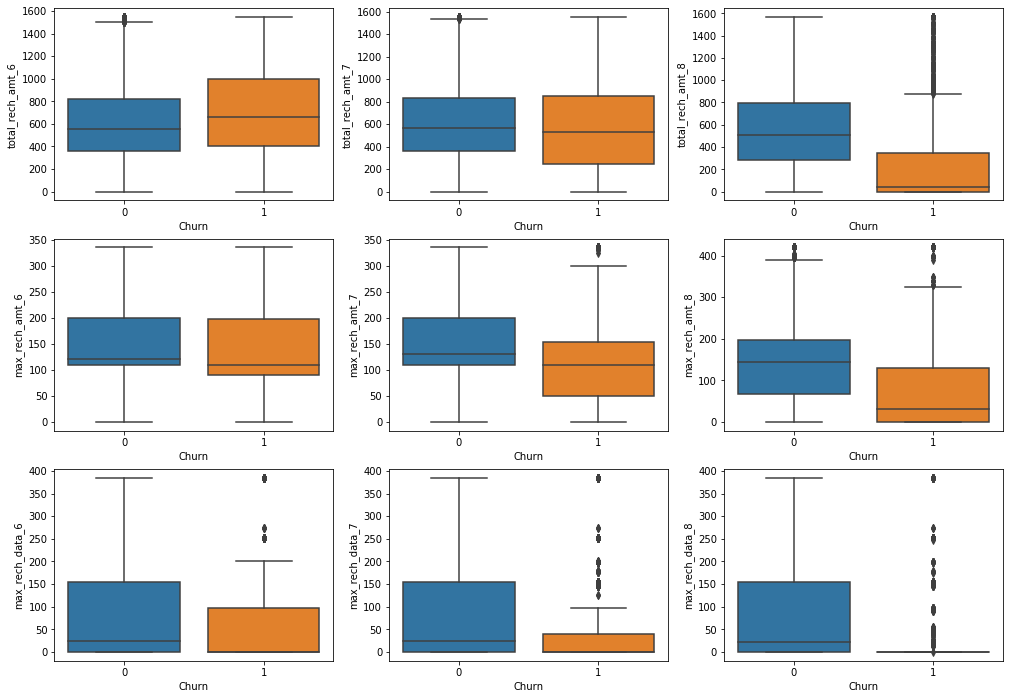

In [144]:
# Analyse using box plots for total_rech_amt, max_rech_amt_7 and max_rech_data_7
plt.figure(figsize = (17,12))
var = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'Churn', y = i[1], data = df)

##### We can see from the above box plots that the recharge done in the 8th month (action phase) is very low when compared to the previous months.


#### Purchase flag vs other variables:

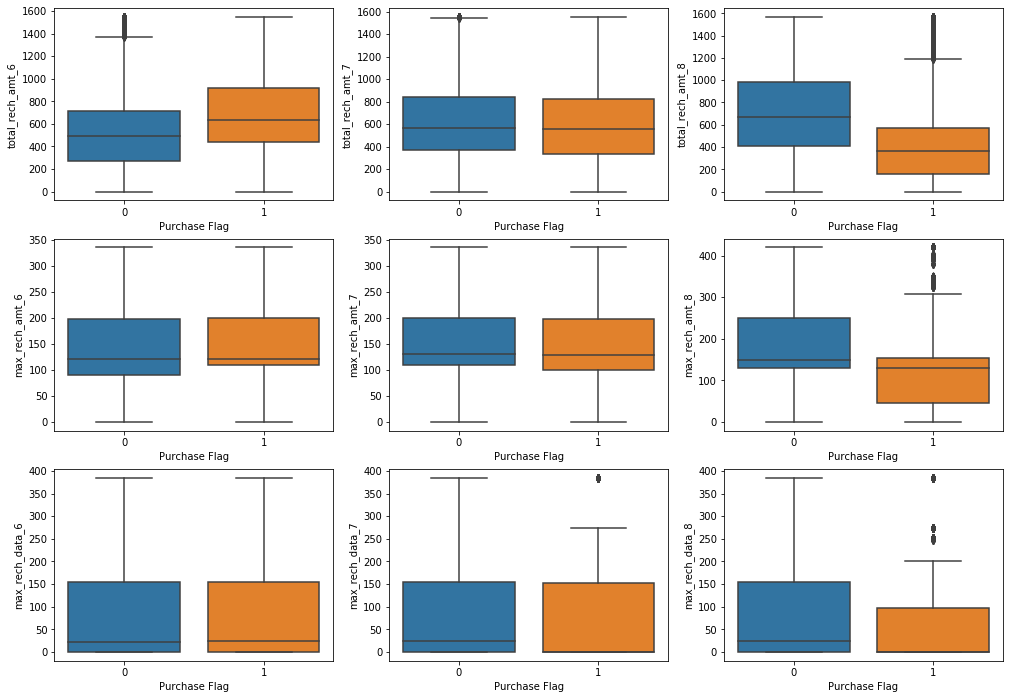

In [152]:
# Analyse using box plots for total_rech_amt, max_rech_amt_7 and max_rech_data_7
plt.figure(figsize = (17,12))
var = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'Purchase Flag', y = i[1], data = df)

#### Talktime flag vs other variables:

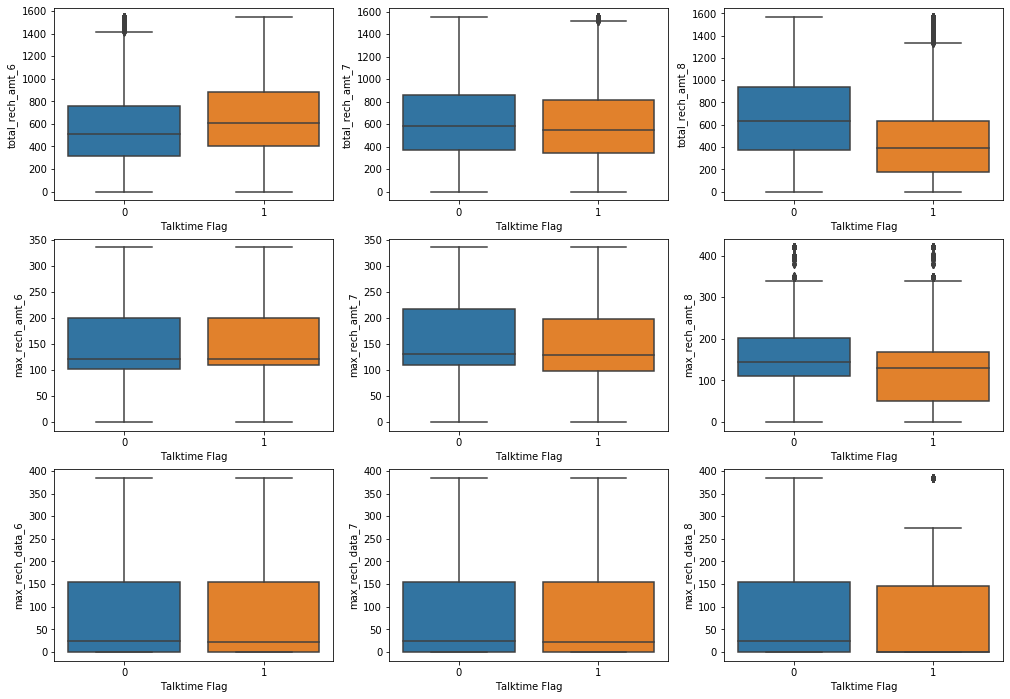

In [153]:
# Analyse using box plots for total_rech_amt, max_rech_amt_7 and max_rech_data_7
plt.figure(figsize = (17,12))
var = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'Talktime Flag', y = i[1], data = df)

##### Overall, for the 8th month, less talktime and purchases have been done.

#### So now let's look at Tenure vs number of customers 

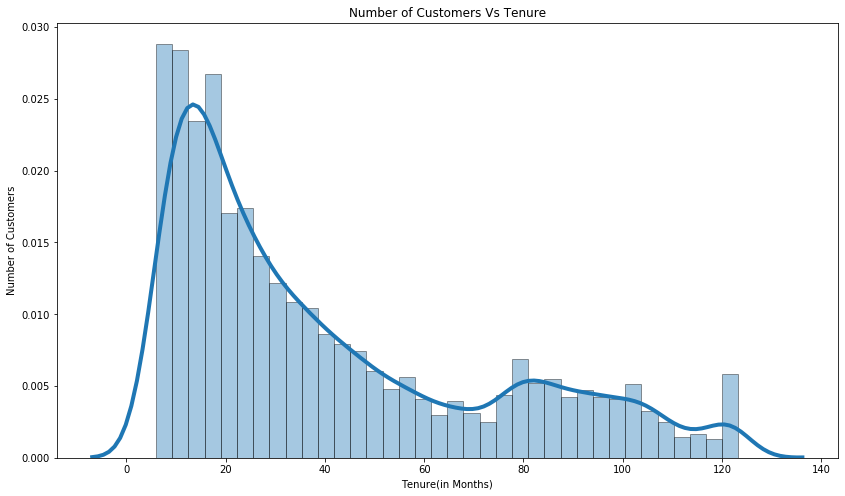

In [158]:
plt.figure(figsize=(14,8))
df['tenure'] = df['aon']/30
dist_plot = sns.distplot(df['tenure'], bins=int(180/5), hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
dist_plot.set_xlabel('Tenure(in Months)')
dist_plot.set_ylabel('Number of Customers')
dist_plot.set_title('Number of Customers Vs Tenure')
plt.show()

#### We can see that the number of customers have decresed over the period of months

### Correlation matrix

In [52]:
# prepare a heatmap to show multiple correlations
# Correlation matrix
df2=df[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_mou_6','std_og_t2t_mou_6','total_og_mou_6','std_og_mou_6']].copy()
cor = df2.corr()
cor

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_6,std_og_t2t_mou_6,total_og_mou_6,std_og_mou_6
loc_og_t2t_mou_6,1.000000,0.536074,0.309715,0.761753,-0.021002,0.352333,-0.057298
loc_og_t2m_mou_6,0.536074,1.000000,0.396132,0.887396,-0.108809,0.347568,-0.121429
loc_og_t2f_mou_6,0.309715,0.396132,1.000000,0.388329,-0.115620,0.047063,-0.156288
loc_og_mou_6,0.761753,0.887396,0.388329,1.000000,-0.124561,0.433903,-0.129205
std_og_t2t_mou_6,-0.021002,-0.108809,-0.115620,-0.124561,1.000000,0.547662,0.755190
total_og_mou_6,0.352333,0.347568,0.047063,0.433903,0.547662,1.000000,0.779965
std_og_mou_6,-0.057298,-0.121429,-0.156288,-0.129205,0.755190,0.779965,1.000000


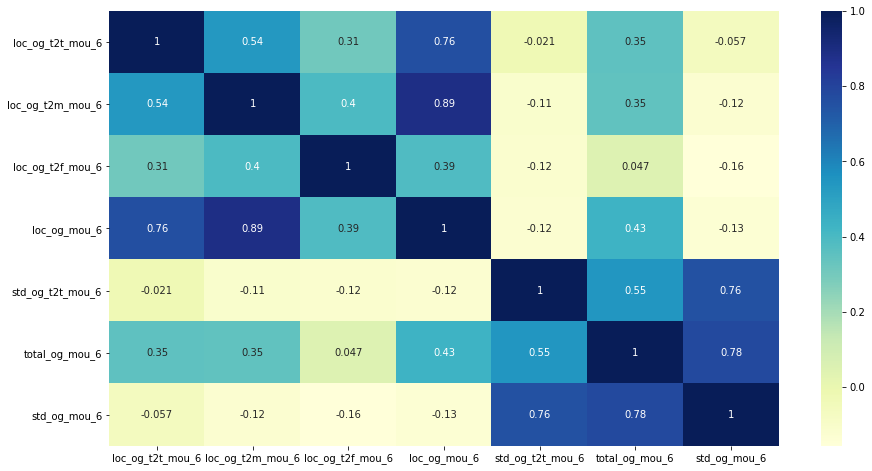

In [53]:
# Figure size
plt.figure(figsize=(15,8))

sns.heatmap(cor,cmap="YlGnBu", annot=True)
plt.show()

##### By looking at the above matrix, we can see that 'loc_og_t2m_mou_6', 'std_og_t2t_mou_6' and 'total_og_mou_6' have high correlation.

### Handling categorical fields

In [54]:
cat_cols.remove('Churn')
#Drop first removes the -1 imputation which we did for these cat_cols
c=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
t=pd.get_dummies(df[c],columns=c,drop_first=True)
df=df.drop(columns=c)
df=pd.concat([df,t],axis=1)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Churn,Purchase Flag,Talktime Flag,Data Flag,night_pck_user_6_0,night_pck_user_6_1,night_pck_user_7_0,night_pck_user_7_1,night_pck_user_8_0,night_pck_user_8_1,fb_user_6_0,fb_user_6_1,fb_user_7_0,fb_user_7_1,fb_user_8_0,fb_user_8_1
0,197.385,214.8160,213.803,-77.698466,-40.315432,0.00,359.891273,355.068981,0.00,0.0,0.0,0.0,0.0,0.0,0.0,57.430916,39.93187,0.00,166.275884,165.96094,0.00,6.462317,6.538986,0.00,0.0,-0.15,0.000,-16.301911,-56.549367,0.00,177.542743,185.119229,0.00,182.809319,191.319157,0.000000,0.0,0.0,0.0,242.986264,255.896002,0.00,0.0,0.0,0.0,5.924374,7.236463,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,79.287169,58.858494,0.16,153.197192,154.392513,4.13,15.556137,16.327755,1.150,98.900094,84.466138,5.44,24.15,25.025,0.000,29.741052,31.383864,0.00,0.75,0.9,0.000,-7.19822,-7.193054,0.000,0.00,0.00,5.44,0.0,0.0,0.0,0.0,0.0,0.000,0.25,0.125,0.000,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,252.0,252.0,30.13,1.320,5.75,83.57,150.76,109.610,87.5,89.225,52.30,126.675,118.05,67.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.000,101.20,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1
1,1069.180,1281.0485,1306.518,57.840000,54.680000,52.29,453.430000,567.160000,325.91,0.0,0.0,0.0,0.0,0.0,0.0,51.390000,31.38000,40.28,308.630000,447.38000,162.28,12.400000,12.650000,13.60,0.0,0.00,0.000,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.140000,0.0,0.0,0.0,60.860000,75.140000,77.84,0.0,0.0,0.0,4.500000,0.000000,6.500000,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,33.900000,34.725000,36.825,427.880000,355.230000,188.04,24.15,11.830,24.825,66.200000,69.350000,69.60,0.75,0.9,1.275,102.18000,107.950000,95.335,626.46,558.04,428.74,0.0,0.0,0.0,0.0,0.0,0.075,0.25,0.125,0.325,5.0,5.0,7.0,1545.0,790.0,1565.0,335.0,335.0,420.0,0.0,0.0,325.0,0.0,0.

### Modelling

Steps undertaken :

Modelling is done in 2 main splits:
- 1. Without PCA using Logistic Regression to identify the key features driving the model
- 2. With PCA using Random Forrest, SVM and XGBoost to get the best possible results

       For the without PCA part, data imbalance is addressed using SMOTE technique
    
       For with PCA section, data imbalance is addressed by assigning class weights as a parameter

In [55]:
df['Churn'].value_counts()/df.shape[0]*100 #Dataset is highly imbalanced and this has to be addressed during modelling

0    91.863605
1     8.136395
Name: Churn, dtype: float64

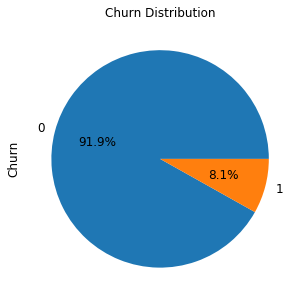

In [56]:
#Churn distribution
distribution = (df['Churn'].value_counts()*100/len(df)).plot.pie(autopct='%.1f%%', labels = ['0', '1'],figsize =(5,5), fontsize = 12 )
distribution.set_ylabel('Churn',fontsize = 12)
distribution.set_title('Churn Distribution', fontsize = 12)
plt.show()

##### From above pie chart, we can clearly see that the data is highly skewed. This has to be addressed during modelling as skewness can lead to a lot of false negatives.

In [57]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42,stratify=df['Churn'])

# Step 1: Without PCA (Baseline Model)
## Model 1: Logistic Regression with RFE

In [58]:
col=list(df.columns)
col.remove('Churn')

y_train=df_train['Churn']
X_train=df_train[col]

y_test=df_test['Churn']
X_test=df_test[col]

In [59]:
#Since training set is imbalanecd, it has to be corrected using SMOTE
from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_sample(X_train,y_train)

In [60]:
y_train.value_counts()/y_train.shape[0]*100 # After SMOTE data is balanced

1    50.0
0    50.0
Name: Churn, dtype: float64

In [61]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

In [63]:
len(X_train.columns)

160

In [64]:
lr=LogisticRegression()
rfe=RFE(lr,20)
rfe=rfe.fit(X_train,y_train)

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 79),
 ('arpu_7', False, 24),
 ('arpu_8', False, 27),
 ('onnet_mou_6', False, 73),
 ('onnet_mou_7', False, 47),
 ('onnet_mou_8', False, 48),
 ('offnet_mou_6', False, 72),
 ('offnet_mou_7', False, 19),
 ('offnet_mou_8', False, 81),
 ('roam_ic_mou_6', False, 109),
 ('roam_ic_mou_7', False, 112),
 ('roam_ic_mou_8', False, 121),
 ('roam_og_mou_6', False, 123),
 ('roam_og_mou_7', False, 125),
 ('roam_og_mou_8', False, 111),
 ('loc_og_t2t_mou_6', False, 17),
 ('loc_og_t2t_mou_7', False, 69),
 ('loc_og_t2t_mou_8', False, 103),
 ('loc_og_t2m_mou_6', False, 89),
 ('loc_og_t2m_mou_7', False, 18),
 ('loc_og_t2m_mou_8', False, 16),
 ('loc_og_t2f_mou_6', False, 67),
 ('loc_og_t2f_mou_7', False, 92),
 ('loc_og_t2f_mou_8', False, 102),
 ('loc_og_t2c_mou_6', False, 128),
 ('loc_og_t2c_mou_7', False, 95),
 ('loc_og_t2c_mou_8', False, 77),
 ('loc_og_mou_6', False, 90),
 ('loc_og_mou_7', False, 68),
 ('loc_og_mou_8', False, 3),
 ('std_og_t2t_mou_6', False, 91),
 ('std_og_t2t_mou_7', Fal

In [66]:
col=list(X_train.columns[rfe.support_])

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(X_train_rfe):
    vif=pd.DataFrame()   # Checking for VIF on the selected features
    vif['features']=X_train_rfe.columns
    vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['VIF']=vif['VIF'].apply(lambda x:round(x,2))
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

#### Iteration 1

In [68]:
X_train_sm=sm.add_constant(X_train[col])
lr=sm.GLM(y_train.astype(float),X_train_sm.astype(float),family=sm.families.Binomial())
lr_model=lr.fit()
print(lr_model.summary())

print(check_vif(X_train_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38561
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13047.
Date:                Mon, 18 May 2020   Deviance:                       26095.
Time:                        12:22:33   Pearson chi2:                 5.64e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0869      0

In [69]:
col.remove('fb_user_8_1') #High vif value

#### Iteration 2

In [70]:
X_train_sm=sm.add_constant(X_train[col])
lr=sm.GLM(y_train.astype(float),X_train_sm.astype(float),family=sm.families.Binomial())
lr_model=lr.fit()
print(lr_model.summary())

print(check_vif(X_train_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13558.
Date:                Mon, 18 May 2020   Deviance:                       27117.
Time:                        12:22:36   Pearson chi2:                 4.96e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0706      0

In [71]:
col.remove('total_ic_mou_8')

#### Iteration 3

In [72]:
X_train_sm=sm.add_constant(X_train[col])
lr=sm.GLM(y_train.astype(float),X_train_sm.astype(float),family=sm.families.Binomial())
lr_model=lr.fit()
print(lr_model.summary())

print(check_vif(X_train_sm))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13597.
Date:                Mon, 18 May 2020   Deviance:                       27194.
Time:                        12:22:38   Pearson chi2:                 4.83e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0736      0

Remaining features have less than 10 multicollinearity and im keeping them for my model

In [73]:
from sklearn import metrics

In [74]:
y_train_pred=lr_model.predict(X_train_sm.astype(float))
df_pred=pd.DataFrame({'CustomerID':y_train_pred.index,'Churned':y_train.astype(float),'Churn_Score':y_train_pred})
df_pred.head()

,CustomerID,Churned,Churn_Score
0,0,0.0,0.018628
1,1,0.0,0.001306
2,2,0.0,0.243906
3,3,0.0,0.032188
4,4,0.0,0.826720


In [75]:
n=[i/10 for i in range(10)]
for i in n:
    df_pred[i]=df_pred['Churn_Score'].map(lambda x:1 if x>i else 0)
df_pred.head()

,CustomerID,Churned,Churn_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0.018628,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.001306,1,0,0,0,0,0,0,0,0,0
2,2,0.0,0.243906,1,1,1,0,0,0,0,0,0,0
3,3,0.0,0.032188,1,0,0,0,0,0,0,0,0,0
4,4,0.0,0.826720,1,1,1,1,1,1,1,1,1,0


In [76]:
def model_metrics(cm):
    d={}
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    d['Accuracy']=(TP+TN)/(TP+TN+FP+FN)
    d['Specificity']=TN/(TN+FP)
    d['Sensitivity']=TP/(TP+FN)
    d['Precision']=TP/(TP+FP)
    d['Recall']=TP/(TP+FN)
    d['True Positive Rate']=TP/(TP+FN)
    d['False Positive Rate']=TN/(TN+FP)
    d['F1 Score']=2*d['Precision']*d['Recall']/(d['Precision']+d['Recall'])
    return d

In [77]:
Prob_df=pd.DataFrame()
for i in n:
    cm=metrics.confusion_matrix(df_pred.Churned,df_pred[i])
    d=model_metrics(cm)
    d['Prob']=i
    temp=pd.DataFrame(pd.Series(d)).T
    Prob_df=pd.concat((Prob_df,temp),axis=0)
Prob_df.set_index('Prob',inplace=True)
Prob_df

,Accuracy,Specificity,Sensitivity,Precision,Recall,True Positive Rate,False Positive Rate,F1 Score
Prob,,,,,,,,
0.0,0.500000,0.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.666667
0.1,0.722435,0.466280,0.978591,0.647083,0.978591,0.978591,0.466280,0.779036
0.2,0.784018,0.617438,0.950599,0.713041,0.950599,0.950599,0.617438,0.814859
0.3,0.818335,0.714426,0.922244,0.763562,0.922244,0.922244,0.714426,0.835435
0.4,0.837670,0.790161,0.885180,0.808370,0.885180,0.885180,0.790161,0.845033
0.5,0.847312,0.849256,0.845368,0.848668,0.845368,0.845368,0.849256,0.847015
0.6,0.846405,0.894251,0.798559,0.883061,0.798559,0.798559,0.894251,0.838687
0.7,0.834431,0.930278,0.738583,0.913743,0.738583,0.738583,0.930278,0.816879
0.8,0.799596,0.959359,0.639832,0.940276,0.639832,0.639832,0.959359,0.761491


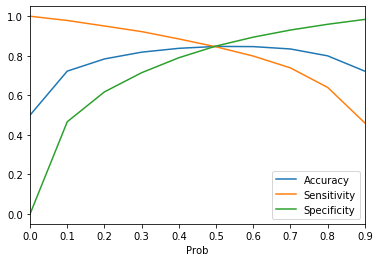

In [78]:
# Plot accuracy, sensitivity and specificity for the various probabilities
Prob_df.plot.line(y=['Accuracy','Sensitivity','Specificity'])
plt.xticks([i/10 for i in range(10)])
plt.show()

In [79]:
df_pred['Churn_Predicted']=df_pred['Churn_Score'].apply(lambda x:1 if x>0.5 else 0)
df_pred=df_pred[['CustomerID','Churned','Churn_Score','Churn_Predicted']]

In [80]:
cm=metrics.confusion_matrix(df_pred['Churned'],df_pred['Churn_Predicted'])
cm

array([[16383,  2908],
       [ 2983, 16308]], dtype=int64)

In [81]:
model_metrics(cm)

{'Accuracy': 0.847312218132808,
 'Specificity': 0.8492561298014618,
 'Sensitivity': 0.8453683064641543,
 'Precision': 0.8486677768526228,
 'Recall': 0.8453683064641543,
 'True Positive Rate': 0.8453683064641543,
 'False Positive Rate': 0.8492561298014618,
 'F1 Score': 0.8470148284727452}

In [82]:
Top_Features=pd.DataFrame(lr_model.params[1:])
Top_Features.rename(columns={0:'Value'},inplace=True)
#Top_Features['Value']=Top_Features['Value'].apply(lambda x:abs(x))
Top_Features.sort_values(by='Value',ascending=True)[:10] #These are the top factors that determine customer churn

,Value
std_ic_mou_8,-1.241758
loc_ic_mou_8,-1.167700
night_pck_user_8_0,-1.161404
av_rech_amt_data_8,-1.000979
night_pck_user_6_0,-0.888560
last_day_rch_amt_8,-0.646027
total_rech_num_8,-0.487729
total_og_mou_8,-0.405198
Purchase Flag,-0.377718
fb_user_8_0,0.039618


It is easier to identify factors which contribute to customer's not churning accurately, hence by focussing on factors which have negative coefficient values, we can identify the key factors which can confirm that the customer would not churn

### Prediction on Test Set

In [83]:
X_test_sm=sm.add_constant(X_test[col])
y_test_pred=lr_model.predict(X_test_sm.astype(float))

In [84]:
test_pred=pd.DataFrame({'CustomerID':y_test_pred.index,'Churned':y_test.astype(float),'Churn_Score':y_test_pred})
test_pred['Churn_Predicted']=test_pred['Churn_Score'].apply(lambda x:1 if x>0.5 else 0)
test_pred.head()

,CustomerID,Churned,Churn_Score,Churn_Predicted
6587,6587,0.0,0.766239,1
3080,3080,0.0,0.118285,0
21632,21632,0.0,0.007015,0
1366,1366,0.0,0.257852,0
5341,5341,0.0,0.151109,0


In [85]:
cm=metrics.confusion_matrix(test_pred['Churned'],test_pred['Churn_Predicted'])
cm

array([[7064, 1205],
       [ 187,  545]], dtype=int64)

In [86]:
model_metrics(cm) #Poor precision because of class imbalance

{'Accuracy': 0.8453505166092656,
 'Specificity': 0.8542750030233401,
 'Sensitivity': 0.744535519125683,
 'Precision': 0.31142857142857144,
 'Recall': 0.744535519125683,
 'True Positive Rate': 0.744535519125683,
 'False Positive Rate': 0.8542750030233401,
 'F1 Score': 0.4391619661563256}

# PCA Models
## Model 2: Random Forrest

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [88]:
# First step is to identify the optimum PCA components

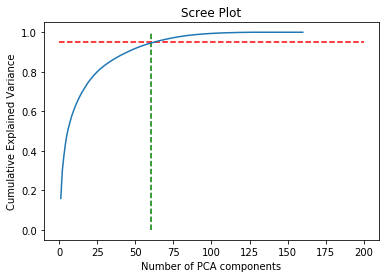

In [89]:
pca=PCA(svd_solver='randomized',random_state=42)
pca.fit(X_train)

scree=[(i+1,j) for i,j in enumerate(np.cumsum(pca.explained_variance_ratio_))]
plt.plot(pd.DataFrame(scree)[0],pd.DataFrame(scree)[1])
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.vlines(x=60, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.95, xmax=200, xmin=0, colors="r", linestyles="--")
plt.title('Scree Plot')
plt.show()  

## 95% variance is explained by 60 components

In [90]:
#Class weight
y_train.value_counts()/y_train.shape[0]*100

1    50.0
0    50.0
Name: Churn, dtype: float64

In [91]:
# Now create pipeline with PCA and the model of choice
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)


rfc_pipe = Pipeline([('PCA', IncrementalPCA(n_components=60)),('rfc',rfc)])
params={'rfc__criterion':['gini','entropy'],
        'rfc__max_features':['auto',0.4]}

n_folds = 3

In [92]:
grid=GridSearchCV(rfc_pipe,param_grid=params,cv=n_folds,verbose=True,scoring='roc_auc',n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  9.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('PCA', IncrementalPCA(n_components=60)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=True)

In [93]:
print(grid.best_params_)
print(grid.best_score_)

{'rfc__criterion': 'entropy', 'rfc__max_features': 'auto'}
0.9876158730475356


In [94]:
rfc = RandomForestClassifier(random_state=42,criterion='entropy',max_features=0.4)
rfc_pipe = Pipeline([('PCA', IncrementalPCA(n_components=60)),('rfc',rfc)])
rfc_pipe.fit(X_train,y_train)

Pipeline(steps=[('PCA', IncrementalPCA(n_components=60)),
                ('rfc',
                 RandomForestClassifier(criterion='entropy', max_features=0.4,
                                        random_state=42))])

In [95]:
rfc_pred=rfc_pipe.predict(X_test)

In [96]:
cm_rfc=metrics.confusion_matrix(y_test,rfc_pred)
cm_rfc

array([[7908,  361],
       [ 345,  387]], dtype=int64)

In [97]:
model_metrics(cm_rfc)

{'Accuracy': 0.921564270636596,
 'Specificity': 0.9563429677107268,
 'Sensitivity': 0.5286885245901639,
 'Precision': 0.517379679144385,
 'Recall': 0.5286885245901639,
 'True Positive Rate': 0.5286885245901639,
 'False Positive Rate': 0.9563429677107268,
 'F1 Score': 0.522972972972973}

## Model 3: SVM

In [98]:
from sklearn.svm import SVC

In [99]:
svm_pipe = Pipeline([('PCA', IncrementalPCA(n_components=60)),('svc',SVC(random_state=42))])
params={'svc__kernel': ['rbf', 'poly','sigmoid']}

In [100]:
grid=GridSearchCV(estimator=svm_pipe,param_grid=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('PCA', IncrementalPCA(n_components=60)),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1, param_grid={'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc', verbose=True)

In [101]:
print(grid.best_params_)
print(grid.best_score_)

{'svc__kernel': 'rbf'}
0.9827864910835515


In [102]:
svc=SVC(random_state=42,kernel='rbf')
svm_pipe=Pipeline([('PCA', IncrementalPCA(n_components=60)),('svc',svc)])
svm_pipe.fit(X_train,y_train)

svm_pred=svm_pipe.predict(X_test)

In [103]:
cm_svm=metrics.confusion_matrix(y_test,svm_pred)
cm_svm

array([[7780,  489],
       [ 297,  435]], dtype=int64)

In [104]:
model_metrics(cm_svm)

{'Accuracy': 0.9126763692923009,
 'Specificity': 0.9408634659571895,
 'Sensitivity': 0.5942622950819673,
 'Precision': 0.4707792207792208,
 'Recall': 0.5942622950819673,
 'True Positive Rate': 0.5942622950819673,
 'False Positive Rate': 0.9408634659571895,
 'F1 Score': 0.5253623188405797}

# Model 4: Logistic Regression with PCA

In [105]:
log_clf=LogisticRegression(random_state=42)
log_pipe=Pipeline([('PCA', IncrementalPCA(n_components=60)),('clf',log_clf)])
params={'clf__C': [0.1,0.3,0.5,0.7,0.9], 'clf__penalty': ['l1', 'l2']}

In [106]:
grid=GridSearchCV(estimator=log_pipe,param_grid=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.1s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('PCA', IncrementalPCA(n_components=60)),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'clf__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=True)

In [107]:
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1, 'clf__penalty': 'l2'}
0.9323183079844589


In [108]:
log_clf=LogisticRegression(random_state=42,C=0.1,penalty='l2')
log_pipe=Pipeline([('PCA', IncrementalPCA(n_components=60)),('clf',log_clf)])
log_pipe.fit(X_train,y_train)

log_pred=log_pipe.predict(X_test)

In [109]:
cm_log=metrics.confusion_matrix(y_test,log_pred)
cm_log

array([[7170, 1099],
       [ 208,  524]], dtype=int64)

In [110]:
model_metrics(cm_log)

{'Accuracy': 0.8547939117875791,
 'Specificity': 0.8670939654129882,
 'Sensitivity': 0.7158469945355191,
 'Precision': 0.3228589032655576,
 'Recall': 0.7158469945355191,
 'True Positive Rate': 0.7158469945355191,
 'False Positive Rate': 0.8670939654129882,
 'F1 Score': 0.44501061571125267}

# Model 5: Using XGBoost

In [111]:
import xgboost as xgb

In [112]:
xgb_clf=xgb.XGBClassifier(random_state=42,objective ='reg:logistic')
xgb_pipe=Pipeline([('PCA', IncrementalPCA(n_components=60)),('xgb',xgb_clf)])
params={'xgb__learning_rate': [0.005,0.01,0.05], 'xgb__penalty': ['l1', 'l2']}

In [113]:
grid=GridSearchCV(estimator=xgb_pipe,param_grid=params,cv=3,verbose=True,scoring='recall',n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('PCA', IncrementalPCA(n_components=60)),
                                       ('xgb',
                                        XGBClassifier(objective='reg:logistic',
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.005, 0.01, 0.05],
                         'xgb__penalty': ['l1', 'l2']},
             scoring='recall', verbose=True)

In [114]:
print(grid.best_params_)
print(grid.best_score_)

{'xgb__learning_rate': 0.05, 'xgb__penalty': 'l1'}
0.8264991154254693


In [115]:
xgb_clf=xgb.XGBClassifier(random_state=42,objective ='reg:logistic',learning_rate = 0.01,penalty='l1')
xgb_pipe=Pipeline([('PCA', IncrementalPCA(n_components=60)),('xgb',xgb_clf)])
xgb_pipe.fit(X_train,y_train)

xgb_pred=xgb_pipe.predict(X_test)

In [116]:
cm_xgb=metrics.confusion_matrix(y_test,xgb_pred)
cm_xgb

array([[6932, 1337],
       [ 233,  499]], dtype=int64)

In [117]:
model_metrics(cm_xgb)

{'Accuracy': 0.8255749361182091,
 'Specificity': 0.8383117668400049,
 'Sensitivity': 0.6816939890710383,
 'Precision': 0.2717864923747277,
 'Recall': 0.6816939890710383,
 'True Positive Rate': 0.6816939890710383,
 'False Positive Rate': 0.8383117668400049,
 'F1 Score': 0.38862928348909653}

# Conclusion

The primary goal of the analysis was to create a model which can succesfully predict customers who will churn. Since it is more important to identify churners than the non-churners accurately, accuracy of the model is not our main evaluation criteria but the sensitivity/recall of the model.

Out of the 5 models which we created, the one which gives the best sensitivity/recall is the Logistic Regression model. Actually the best result is yielded by the Baseline model using RFE, but I'm choosing Model4 Logistic Regression with PCA and regularization as it could be a more stable model.

In [118]:
print('Model Metrics of the chosen model are as follows: ')
round(pd.Series(model_metrics(cm_log))*100,2) 

Model Metrics of the chosen model are as follows: 


Accuracy               85.48
Specificity            86.71
Sensitivity            71.58
Precision              32.29
Recall                 71.58
True Positive Rate     71.58
False Positive Rate    86.71
F1 Score               44.50
dtype: float64

The low Precision score is due to class imbalance in the test-set and this inturn affected the F1 Score. Our main focus however for this study, is the **Sensitivity/Recall** score and the model is able to achieve a decent **72%** in that metric.

By evaluating the Baseline model using RFE and Logistic Regression, we were able to identify the key factors which contributed to determining the churn of a customer and they are as follows:

In [119]:
k=Top_Features.sort_values(by='Value',ascending=True)[:10]
k=k.apply(lambda x:-(x)) #Reversing the sign so as to make the values more interpretable
k
#Higher the value, less likely to churn

,Value
std_ic_mou_8,1.241758
loc_ic_mou_8,1.167700
night_pck_user_8_0,1.161404
av_rech_amt_data_8,1.000979
night_pck_user_6_0,0.888560
last_day_rch_amt_8,0.646027
total_rech_num_8,0.487729
total_og_mou_8,0.405198
Purchase Flag,0.377718
fb_user_8_0,-0.039618


- **Std and Local Incoming calls are strong indicators of Churn**. If the customer is having good amount calls in the last month (August) then it is less likely that the customer will churn.
- **Purchase Flag is another excellent indicator of churn**. This indicates if the amount customer spend on the services both calls and data on the last month is less than historical average. Hence if the customer is flagged as 1, then it could be a cause for concern.
- **fb_user**. fb_user_8_0 has a negative weight which indicates that the if the customer did subscribe to the Fb through the telecom service, then he/she is less likely to churn.
- **Customer with high minutes of usage** in the swing month of August are less likely to churn.

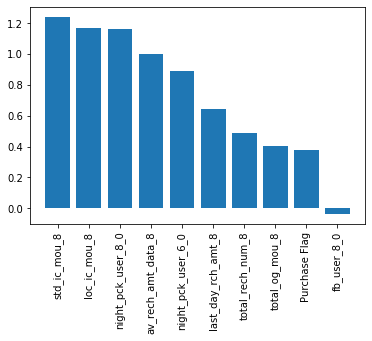

In [120]:
k=pd.DataFrame(k)
plt.bar(x=k.index,height=k.Value)
plt.xticks(rotation=90)
plt.show()

**Logistic Regression produced the best results in terms of Sensitivity/Recall followed by XGBoost Classifer using Logistic model.**